In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

# Simulação Para Apenas 1 Sítio
As equações são:
\begin{equation}
    \begin{cases}
        x_{t+1} = x_t \left(2-x_t-\frac{a_1 y_t}{1+b_1 x_t}\right) \\
        y_{t+1} = y_t \left(1-d_1+\frac{a_1 x_{t+1}}{1+b_1 x_{t+1}}-\frac{a_2 z_t}{1+b_2 y_t}\right) \\
        z_{t+1} = z_t \left(1-d_2+\frac{a_2 y_{t+1}}{1+b_2 y_{t+1}}\right)
    \end{cases}
\end{equation}

In [3]:
def u(x, y, a_1, b_1):
    return x * (2 - x - a_1 * y / (1 + b_1 * x))


def v(x_new, y, z, a_1, a_2, b_1, b_2, d_1):
    return y * (1 - d_1 + a_1 * x_new / (1 + b_1 * x_new) - a_2 * z / (1 + b_2 * y))


def w(y_new, z, a_2, b_2, d_2):
    return z * (1 - d_2 + a_2 * y_new / (1 + b_2 * y_new))

In [4]:
def _calculate_next_step(array, a_1, a_2, b_1, b_2, d_1, d_2):
    """This function receives an array containing the number of individuals for the species x, y and z, respectively,
    at a time t. The functions returns the new values of  x, y and z at a time t+1.

    Args:
        array (Array): List containing the number os individuals x, y, z, i.e. [x(t), y(t), z(t)];
        a_1 (Float): The value of the a_1 param;
        a_2 (Float): The value of the a_2 param;
        b_1 (Float): The value of the a_1 param;
        b_2 (Float): The value of the b_2 param;
        d_1 (Float): The value of the d_1 param;
        d_2 (Float): The value of the d_2 param;
    Returns:
        Array of the new values of x, y and z in this order, i.e, [x(t+1), y(t+1), z(t+1)]
    """
    x = array[0]
    y = array[1]
    z = array[2]
    x_new = u(x, y, a_1, b_1)
    y_new = v(x_new, y, z, a_1, a_2, b_1, b_2, d_1)
    z_new = w(y_new, z, a_2, b_2, d_2)
    return np.array([x_new, y_new, z_new], dtype=float)


def integrate_system(initial_conditions, number_steps, params):
    """The function solve the HPM sytem with a time step of 1 and returns the solution at each time t.

    Args:
        initial_condition (array-like): The initial conditions for x, y and z in this order,  i.e. [x(0),y(0),z(0)]
        number_steps (int): The number of iterations.
        params (array-like): An array containing the parameters of the system in te order [a_1, a_2, b_1, b_2, d_1, d_2]
    Returns:
        Returns an array of arrays with the x, y and z values at each time t with 0 < t < number_steps.
    """
    a_1, a_2, b_1, b_2, d_1, d_2 = params
    x_species = []
    y_species = []
    z_species = []
    all_species = initial_conditions
    for k in range(number_steps):
        x_species.append(all_species[0])
        y_species.append(all_species[1])
        z_species.append(all_species[2])
        all_species = _calculate_next_step(all_species, a_1, a_2, b_1, b_2, d_1, d_2)
    return np.array([x_species, y_species, z_species])

In [5]:
seed_1_site = 27900525585288891977993409593610930496  # Set a seed for the generator
generator_1_site = np.random.default_rng(seed=seed_1_site)
initial_cond_1_site = np.array([0.820, 0.124, 10.056])
noise_1_site = generator_1_site.uniform(
    -0.05 * initial_cond_1_site, 0.05 * initial_cond_1_site
)
params_1_site = (5, 0.1, 3.2, 2, 0.4, 0.01)
number_steps_1_site = 6500
time = np.arange(0, number_steps_1_site, 1)
x, y, z = integrate_system(
    initial_cond_1_site + noise_1_site, number_steps_1_site, params_1_site
)

## Plots dos Resultados

Text(0, 0.5, '$x(t)$')

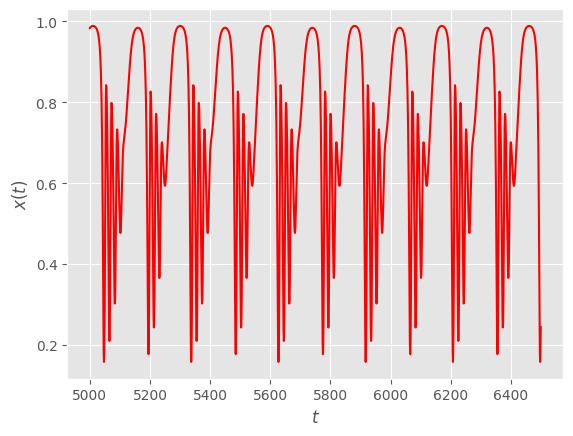

In [6]:
plt.style.use("ggplot")
_ = plt.plot(time[5000:], x[5000:], color="red")
plt.xlabel("$t$")
plt.ylabel("$x(t)$")

Text(0, 0.5, '$y(t)$')

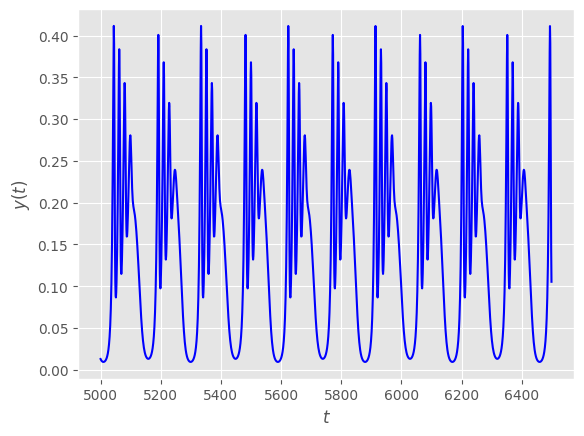

In [7]:
_ = plt.plot(time[5000:], y[5000:], color="blue")
plt.xlabel("$t$")
plt.ylabel("$y(t)$")

Text(0.5, 0, '$t$')

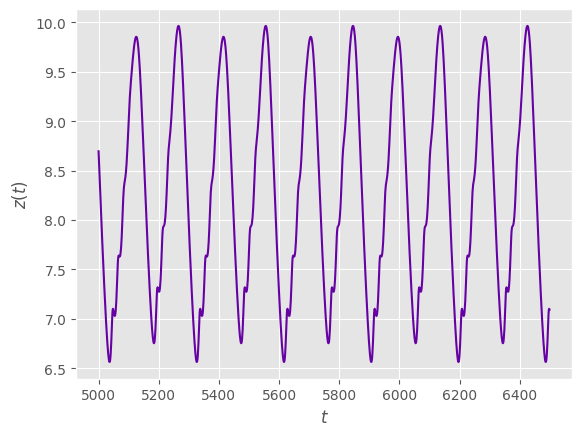

In [8]:
_ = plt.plot(time[5000:], z[5000:], color="#6601A4")
plt.ylabel("$z(t)$")
plt.xlabel("$t$")

Text(0.5, 0, '$z$')

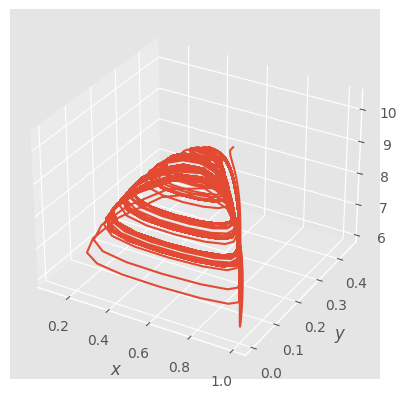

In [9]:
# %matplotlib widget
# careful with the magic command above, i dont know how to stop matplotlib from plotting other graphs on this 3d graph
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
_ = ax.plot(x, y, z)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")

# Para 2 Sítios com Migração entre Eles
As equações são:
\begin{equation}
    \begin{cases}
        x^i_{t+1} = x^i_t \left(2-x^i_t-\frac{a_1 y^i_t}{1+b_1 x^i_t}\right)+D_x \left(x^j_t - x^i_t\right)\\
        y^i_{t+1} = y^i_t \left(1-d_1+\frac{a_1 x^i_{t+1}}{1+b_1 x^i_{t+1}}-\frac{a_2 z^i_t}{1+b_2 y^i_t}\right)+D_y \left(y^j_t-y^i_t\right)\\
        z^i_{t+1} = z^i_t \left(1-d_2+\frac{a_2 y^i_{t+1}}{1+b_2 y^i_{t+1}}\right)D_z\left(z^j_t-z^i_t\right)
    \end{cases}
\end{equation}
Com $i \neq j$. Por exemplo, para o sítio 1 as equações seriam:
\begin{equation}
    \begin{cases}
        x^1_{t+1} = x^1_t \left(2-x^1_t-\frac{a_1 y^1_t}{1+b_1 x^1_t}\right)+D_x \left(x^2_t - x^1_t\right)\\
        y^1_{t+1} = y^1_t \left(1-d_1+\frac{a_1 x^1_{t+1}}{1+b_1 x^1_{t+1}}-\frac{a_2 z^1_t}{1+b_2 y^1_t}\right)+D_y \left(y^2_t-y^1_t\right)\\
        z^1_{t+1} = z^1_t \left(1-d_2+\frac{a_2 y^1_{t+1}}{1+b_2 y^1_{t+1}}\right)+D_z\left(z^2_t-z^1_t\right)
    \end{cases}
\end{equation}

In [10]:
def _calculate_next_step_2_sites(array, a_1, a_2, b_1, b_2, d_1, d_2, D_x, D_y, D_z):
    """This function calculates one interaction of the HPM equations for 2 sites with migration between then.

    Args:
        array (Array): 2D array containing the x, y and z values for the species for both sides. It's assumed that this array is in the form of
        [[x_1,x_2],[y_1,y_2],[z_1,z_2]].
        a_1 (Float): The value of the a_1 param;
        a_2 (Float): The value of the a_2 param;
        b_1 (Float): The value of the a_1 param;
        b_2 (Float): The value of the b_2 param;
        d_1 (Float): The value of the d_1 param;
        d_2 (Float): The value of the d_2 param;
        D_x (float or Array-like): The migration coefficient of the x species between site 1 and 2. This can be an float if the
        migration is equal between the sites, or it can be an array with 2 values: [D_z12, D_z21] where the indicies correspond to the migration i->j
        D_y (float or Array-like): The migration coefficient of the y species between site 1 and 2. This can be an float if the
        migration is equal between the sites, or it can be an array with 2 values: [D_y12, D_y21] where the indicies correspond to the migration i->j
        D_z (float or Array-like): The migration coefficient of the z species between site 1 and 2. This can be an float if the
        migration is equal between the sites, or it can be an array with 2 values: [D_z12, D_z21] where the indicies correspond to the migration i->j

    Returns:
        Returns a 2D array containing the new values of x, y and z, in this order, for both sites.
    """
    x = array[0]
    y = array[1]
    z = array[2]
    x_new = u(x, y, a_1, b_1) + D_x * np.diff(x, append=x[0])
    y_new = v(x_new, y, z, a_1, a_2, b_1, b_2, d_1) + D_y * np.diff(y, append=y[0])
    z_new = w(y_new, z, a_2, b_2, d_2) + D_z * np.diff(z, append=z[0])
    return np.array([x_new, y_new, z_new], dtype=float)


def integrate_2_sites_system(initial_conditions, number_steps, params):
    """This function solves a 2 sites HPM system of equations with migration bewtween then. The time step used is 1 and it returns the solution
    for each time t.

    Args:
        initial_cond (Array): 2D array with the initial conditions for each species in each site, i.e.,
        [[x_1(0), x_2(0)],[y_1(0),y_2(0)],[z_1(0),z_2(0)]].
        number_steps (int): The number of iterations.
        params (Array-like): An array containing the parameters of the system.

    Returns:
        Returns the solution of the system in the form: [[x_sol], [y_sol], [z_sol]] where x_sol is a matrix of the form
        [[x_1(0), x_2(0)], [x_1(1), x_2(2)],...] and so on.
    """
    a_1, a_2, b_1, b_2, d_1, d_2, D_x, D_y, D_z = params
    x_matrix = []
    y_matrix = []
    z_matrix = []
    species_matrix = initial_conditions
    for k in range(number_steps):
        x_matrix.append(species_matrix[0])
        y_matrix.append(species_matrix[1])
        z_matrix.append(species_matrix[2])
        species_matrix = _calculate_next_step_2_sites(
            species_matrix, a_1, a_2, b_1, b_2, d_1, d_2, D_x, D_y, D_z
        )
    return np.array([x_matrix, y_matrix, z_matrix])

In [11]:
seed_2_sites = 173794472965835828579391201983769539881
generator_2_sites = np.random.default_rng(seed=seed_2_sites)
initial_cond_2_sites = np.array([[0.820, 0.820], [0.124, 0.124], [10.056, 10.056]])
noise_2_sites = generator_2_sites.uniform(
    -0.05 * initial_cond_2_sites, 0.05 * initial_cond_2_sites
)
initial_cond_2_sites = initial_cond_2_sites + noise_2_sites
params_2_sites = (5, 0.1, 3.2, 2, 0.4, 0.01, 0.5, 0, 0.5)
number_of_steps_2_sites = 6500
x_matrix_2_sites, y_matrix_2_sites, z_matrix_2_sites = integrate_2_sites_system(
    initial_cond_2_sites, number_of_steps_2_sites, params_2_sites
)

# Plot dos Resultados

Text(0, 0.5, '$x(t)$')

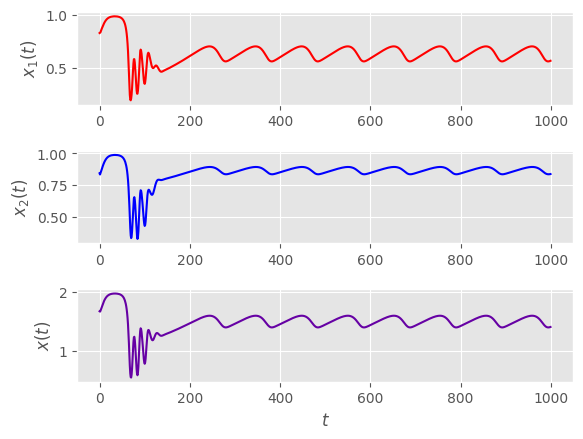

In [12]:
fig_2_sites, ax_2_sites = plt.subplots(3)
ax_2_sites[0].plot(time[:1000], x_matrix_2_sites[:1000, 0], color="red")
ax_2_sites[1].plot(time[:1000], x_matrix_2_sites[:1000, 1], color="blue")
ax_2_sites[2].plot(
    time[:1000],
    x_matrix_2_sites[:1000, 0] + x_matrix_2_sites[:1000, 1],
    color="#6601A4",
)
ax_2_sites[2].set_xlabel("$t$")
plt.subplots_adjust(hspace=0.5)
ax_2_sites[0].set_ylabel("$x_1(t)$")
ax_2_sites[1].set_ylabel("$x_2(t)$")
ax_2_sites[2].set_ylabel("$x(t)$")

Text(0, 0.5, '$y(t)$')

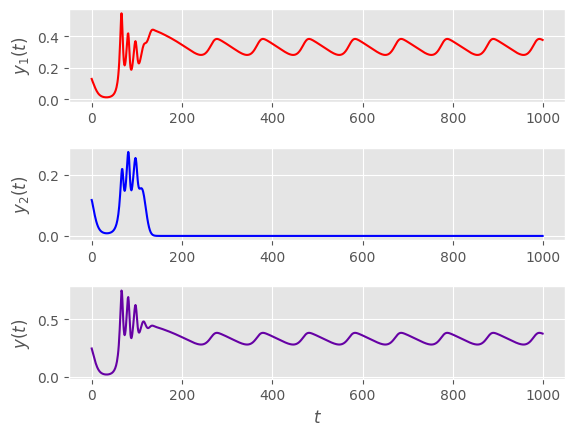

In [13]:
fig_2_sites, ax_2_sites = plt.subplots(3)
ax_2_sites[0].plot(time[:1000], y_matrix_2_sites[:1000, 0], color="red")
ax_2_sites[1].plot(time[:1000], y_matrix_2_sites[:1000, 1], color="blue")
ax_2_sites[2].plot(
    time[:1000],
    y_matrix_2_sites[:1000, 0] + y_matrix_2_sites[:1000, 1],
    color="#6601A4",
)
ax_2_sites[2].set_xlabel("$t$")
plt.subplots_adjust(hspace=0.5)
ax_2_sites[0].set_ylabel("$y_1(t)$")
ax_2_sites[1].set_ylabel("$y_2(t)$")
ax_2_sites[2].set_ylabel("$y(t)$")

Text(0, 0.5, '$z(t)$')

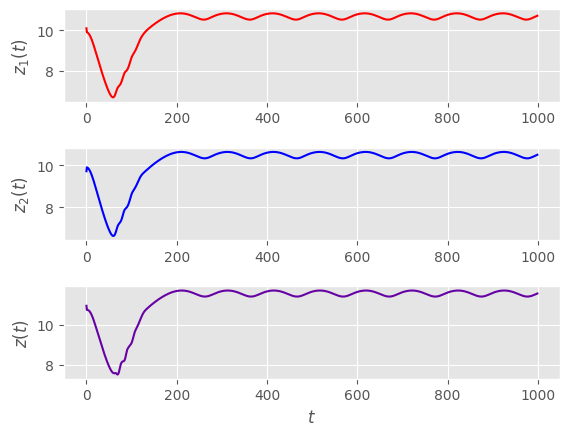

In [14]:
fig_2_sites, ax_2_sites = plt.subplots(3)
ax_2_sites[0].plot(time[:1000], z_matrix_2_sites[:1000, 0], color="red")
ax_2_sites[1].plot(time[:1000], z_matrix_2_sites[:1000, 1], color="blue")
ax_2_sites[2].plot(
    time[:1000],
    z_matrix_2_sites[:1000, 0] + x_matrix_2_sites[:1000, 1],
    color="#6601A4",
)
ax_2_sites[2].set_xlabel("$t$")
plt.subplots_adjust(hspace=0.5)
ax_2_sites[0].set_ylabel("$z_1(t)$")
ax_2_sites[1].set_ylabel("$z_2(t)$")
ax_2_sites[2].set_ylabel("$z(t)$")

Text(0.5, 0, '$z$')

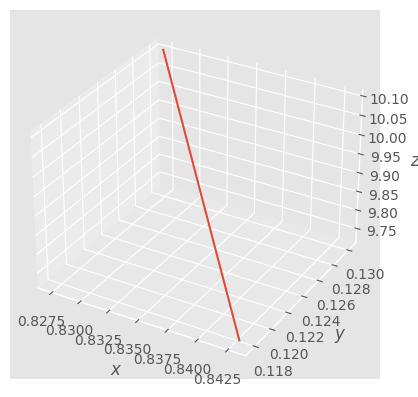

In [15]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
_ = ax.plot(x_matrix_2_sites[0], y_matrix_2_sites[0], z_matrix_2_sites[0])
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")

# Para N sítios com migração entre todos eles
As equações são:
\begin{equation}
    \begin{cases}
        x^i_{t+1} = x^i_t \left(2-x^i_t-\frac{a_1 y^i_t}{1+b_1 x^i_t}\right)+D_x \left(\bar{x_t} - x^i_t\right)\\
        y^i_{t+1} = y^i_t \left(1-d_1+\frac{a_1 x^i_{t+1}}{1+b_1 x^i_{t+1}}-\frac{a_2 z^i_t}{1+b_2 y^i_t}\right)+D_y \left(\bar{y_t}-y^i_t\right)\\
        z^i_{t+1} = z^i_t \left(1-d_2+\frac{a_2 y^i_{t+1}}{1+b_2 y^i_{t+1}}\right)D_z\left(\bar{z_t}-z^i_t\right)
    \end{cases}
\end{equation}
Onde $\bar{x_t} = \frac{1}{N}\sum_{j\neq i}x^j_t$. \
TO DO: TRACKING DA SINCRONIZAÇÃO DO SISTEMA

In [16]:
def _calculate_mean(array):
    """This function calculates means of an array excluding the first element, and then the second, and so on.

    Args:
        array (Array): 1D array.

    Retruns:
        Returns an array containing the means of the array.

    Example:
        array = np.array([1,2,3,4,5])
        mean_array = _calculate_mean(array)
        mean_array
        [3.5 , 3.25, 3.0, 2.75, 2.5]
    """
    mean_arr = []
    for number in array:
        mask = array != number
        if array[mask].size > 0:
            mean_arr.append(np.mean(array, where=mask))
        else:
            mean_arr.append(number)
    return np.array(mean_arr)


def _calculate_next_step_N_sites(array, a_1, a_2, b_1, b_2, d_1, d_2, D_x, D_y, D_z):
    """This function iterates the HPM system with N sites.

    Args:
        array (Array): ND array containing the x, y and z values for the species for all sites. It's assumed that this array is in the form of
        [[x_1,x_2,...],[y_1,y_2,...],[z_1,z_2,...]].
        a_1 (Float): The value of the a_1 param;
        a_2 (Float): The value of the a_2 param;
        b_1 (Float): The value of the a_1 param;
        b_2 (Float): The value of the b_2 param;
        d_1 (Float): The value of the d_1 param;
        d_2 (Float): The value of the d_2 param;
        D_x (float or Array-like): The migration coefficient of the x species between the sites. Similarly to the 2 sites case, this can be a single value, i.e, all the
        sites have the same, or an N-dimensional array containing the migration coefficient between each site.
        D_y (float or Array-like): The migration coefficient of the y species between site 1 and 2. Similarly to the 2 sites case, this can be a single value, i.e, all the
        sites have the same, or an N-dimensional array containing the migration coefficient between each site.
        D_z (float or Array-like): The migration coefficient of the z species between site 1 and 2. Similarly to the 2 sites case, this can be a single value, i.e, all the
        sites have the same, or an N-dimensional array containing the migration coefficient between each site.

    Returns:
        Returns an matrix containing the new values of x, y and z in the form: [[x_1,x_2,...],[y_1,y_2,...],[z_1,z_2,...]].
    """
    x = array[0]
    y = array[1]
    z = array[2]
    x_means = _calculate_mean(x)
    y_means = _calculate_mean(y)
    z_means = _calculate_mean(z)
    x_new = u(x, y, a_1, b_1) + D_x * (x_means - x)
    y_new = v(x_new, y, z, a_1, a_2, b_1, b_2, d_1) + D_y * (y_means - y)
    z_new = w(y_new, z, a_2, b_2, d_2) + D_z * (z_means - z)
    return np.array([x_new, y_new, z_new])


def integrate_N_sites_sytem(initial_conditions, number_steps, params):
    """This function solves a N sites HPM system of equations with migration bewtween then. The time step used is 1 and it returns the solution
    for each time t.

    Args:
        initial_cond (Array): ND array with the initial conditions for each species in each site, i.e.,
        [[x_1(0), x_2(0),...],[y_1(0),y_2(0),...],[z_1(0),z_2(0),...]].
        number_steps (int): The number of iterations.
        params (Array-like): An array containing the parameters of the system.

    Returns:
        Returns the solution of the system in the form: [[x_sol], [y_sol], [z_sol]] where x_sol is a matrix of the form
        [[x_1(0), x_2(0),...], [x_1(1), x_2(2),...],...] and so on.
    """
    a_1, a_2, b_1, b_2, d_1, d_2, D_x, D_y, D_z = params
    x_matrix = []
    y_matrix = []
    z_matrix = []
    species_matrix = initial_conditions
    for k in range(number_steps):
        x_matrix.append(species_matrix[0])
        y_matrix.append(species_matrix[1])
        z_matrix.append(species_matrix[2])
        species_matrix = _calculate_next_step_N_sites(
            species_matrix, a_1, a_2, b_1, b_2, d_1, d_2, D_x, D_y, D_z
        )
    return np.array([x_matrix, y_matrix, z_matrix])

In [27]:
seed_N_sites = 237659272047298132505722342496921577560
# seed_N_sites = 173794472965835828579391201983769539881
generator_N_sites = np.random.default_rng(seed=seed_N_sites)
number_sites = 2
initial_cond_N_sites = np.array(
    [
        np.full(number_sites, 0.820),
        np.full(number_sites, 0.124),
        np.full(number_sites, 10.056),
    ]
)
noise_N_sites = generator_N_sites.uniform(
    -0.05 * initial_cond_N_sites, 0.05 * initial_cond_N_sites
)
initial_cond_N_sites = initial_cond_N_sites + noise_N_sites
params_N_sites = (5, 0.1, 3.2, 2, 0.4, 0.01, 0.5, 0., 0.5)
number_of_steps_N_sites = 6500
x_matrix_N_sites, y_matrix_N_sites, z_matrix_N_sites = integrate_N_sites_sytem(
    initial_cond_N_sites, number_of_steps_N_sites, params_N_sites
)

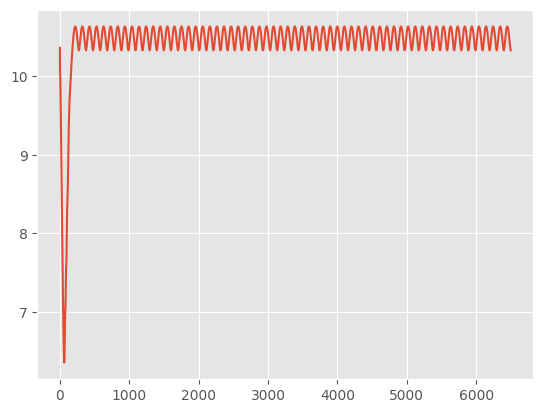

In [29]:
_ = plt.plot(time, z_matrix_N_sites[:,1])

# Sincronização do Sistema
A sincronização do sistema é dada por:
\begin{equation}
    s = e^{-d}
\end{equation}
Onde:
\begin{equation}
    d = \frac{1}{\Delta k}\sum_{k=k_0}^{k_f}d_k
\end{equation}
Com $\Delta k = k_f-k_0$. Por fim, definimos $d_k$ como:
\begin{equation}
    d_k = \sum_{i=1}^{N} \left(x_k^i-\bar{x_k}\right)^2+\left(y_k^i-\bar{y_k}\right)^2+\left(z_k^i-\bar{z_k}\right)^2
\end{equation}

In [18]:
def squared_error(array):
    """This function computes the squared error of an array using the mean as the "truth" value.

    Args:
        array (Array): 1D array containing the values

    Return:
         Return the squared error.
    """
    mean = np.mean(array)
    diff = array - mean
    return np.sum(diff**2)